# 4.3. The goodness of fit and model selection

We now know how to estimate the "best-fit" model parameters and their uncertainties using maximum likelihood estimation, but we still don't know how "good" the fit is. For example, if assume a Gaussian model when in reality our data is not Gaussian, our results might not be very useful.

## The goodness of fit for a model

We will call the maximum value of the likelihood $L^0$. Assuming our model is correct, we can then ask how likely it is that this value would have arisen by chance. If its very unlikely to obtain $L^0$ (or $\ln{L^0}$ by randomly drawing data from the best-fit distribution, the the best-fit model is **not** a good description of the data.

Going back to our case of a Gaussian likelihood, we can rewrite

$$\ln{L}(\mu) = \text{constant} - \sum^N_{i=1} \frac{(x_i - \mu)^2}{2\sigma^2} $$

as

$$ \ln{L} = \text{constant} - \frac{1}{2}\chi^2 $$

where

$$\chi^2 = \sum^N_{i=1}\bigg( \frac{(x_i-\mu)}{\sigma}\bigg)^2 $$

Therefore, the distribution of $\ln{L}$ can be determined from the $\chi^2$ distribution with $N-k$ degrees of freedom, where $k$ is the number of model parameters determined from data (in the case of the homoscedatic errors, $k = 1$ and for heteroscedatic errors, $k=2$)



(in this example $k=1$ because $\mu$ is determined from date ans $\sigma$ was assumed to be fixed). The distribution fo $\chi^2$ does not depend on the actual values of $\mu$ and $\sigma$; the expectation value of the $\chi^2$ distribution is $N-k$ and its standard deviation is $\sqrt{2(N-k)}$. For a "good fit", we expect that $\chi^2$ per degree of freedom,

$$\chi_{\text{dof}}^2 =\frac{1}{N-k} \sum^N_{i=1} z_i^2 \approx 1 $$

If instead $(\chi_{\text{dof}}^2 -1)$ is many times larger than $\sqrt{2(N-k)}$, it is unlikely that the data were generated by the assumed model. Note however that the outliers may significant;y increase $\chi_{text{dof}}^2$. The likelihood of a particular value of $\chi^2$ for a given number of degrees of freedom can be found in tables or evaluated using the function scipy.stats.chi2

As an example consider the simple case of the luminosity of a single star being measured multiple time. Our model is that of a star with no intrinsic luminosity variation. If the model and measurement errors are consistent, this will lead to $\chi_{\text{dof}}^2$ close to 1. Overestimating the measurement errors can lead to an improbability low $\chi_{\text{dof}}^2$, while underestimating measurement errors can lead to an improbability high $\chi_{\text{dof}}^2$. A high $\chi_{\text{dof}}^2$  may also indicate that the model is insufficient to fit the data; for example, if the star has intrinsic variation which is either periodic or stochastic. In this case, accounting for this variability in the model can lead to a better fit to the data. We will explore these options in later chapters.Because the number of samples is large $(N=50)$, the $\chi^2$ distribution is approximately Gaussian: to aid in evaluating the fits, figure 4.1 reports the deviation on $\sigma$ for each fit. 

The probability that a certain maximum likelihood value $L_0$ might have arisen by chance can be evaluated using the $\chi^2$ distribution only when the likelihood is Gaussian. When the likelihood is not Gaussian (e.g., when analyzing small count data which follows the Poisson distribution), $L_0$ is still a measure of how well a model fits the data. Different models, assuming that they have the same number of free parameters, can be ranked in terms of $L^0$. For example, we could derive the best-fit estimates of a Laplace distribution using MLE, and compare the resulting $L^0$ to the value obtained for a Gaussian distribution.

Note, however, that $L^0$ by itself does not tell us how well a model fits the data. That is, we do not know in general if a particular value OF $L^0$ is consistent with simply arising by chance as opposed to the model being inadequate. To quantify this probability, we need to know the expected distribution of $L^0$, as given by the $\chi^2$ distribution in the special case of Gaussian likelihood

## Model Comparison


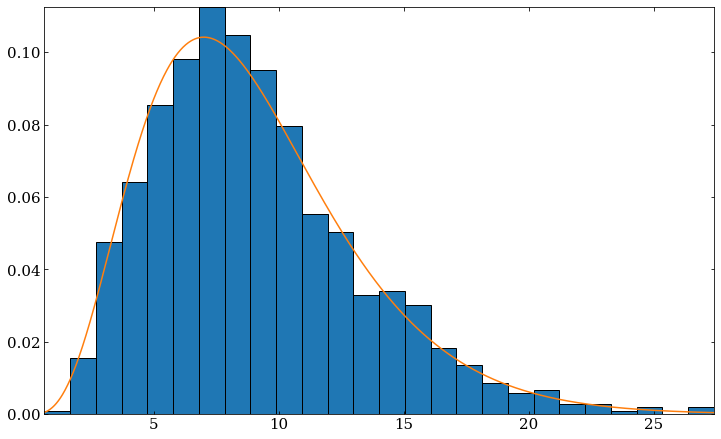

In [6]:

import numpy as np
from scipy.stats import norm, laplace
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples= 10
mu_true = 8
sigma = 2

Ndraws = 1000
chi2vals = np.empty(Ndraws)

for i in range(Ndraws):
    measurements = np.random.normal(mu_true, sigma, Nsamples)
    mu_est = np.average(measurements)
    chi2vals[i] = np.sum(np.square((measurements - mu_est) / sigma))

fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(chi2vals, bins='fd', density=True);

from scipy.stats import chi2
v = np.linspace(*ax.get_xlim(), 1000)
ax.plot(v, chi2.pdf(v, Nsamples - 1));